In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const


In [121]:
# Schottky current due to thermal. from svennson
#thermal voltage, defined as Kb*T/e
VT=300*const.Boltzmann/const.elementary_charge
richardson_const=4*np.pi*const.electron_mass*const.elementary_charge*const.Boltzmann**2/const.h**3

def svennson_current_density(vd,vg,sb0=0.45,n=1.2):
    # 1<n<2 ideality factor. 1 for ideal. 1.2 limit of thermal 
    # Jsat =AA*T^2 exp(-SBe/VT)
    
    sb0=sb0+vg
    sbe=sb0
    Jsat = richardson_const*300**2*np.exp((-sbe)/VT)
    J = Jsat*np.exp(vd/(n*VT))*(1-np.exp(-vd/VT))
    return J
def chiquito_current_density(vd,vg,sb0=0.45,n=1.2):
    # 1<n<2 ideality factor. 1 for ideal. 1.2 limit of thermal 
    # Jsat =AA*T^2 exp(-SBe/VT)
    sb0=sb0+vg
    sbe=sb0+vd*(1/n-1)
    Jsat = richardson_const*300**2*np.exp((-sbe)/VT)
    J = Jsat*np.exp(vd/(n*VT))*(1-np.exp(-vd/VT))
    return J 
def simple_exp(vd,vg):
    VT=300*const.Boltzmann/const.elementary_charge
    C=2e-11
    alpha=0.2
    if vd<=0:
        return 0
    else:
        return C*np.exp(-vg*alpha)*(np.exp(vd/VT)-1)
def simple_quad(vd,vg):
    if vd<=0:
        return 0
    else:
        return np.exp(150*vd)-1

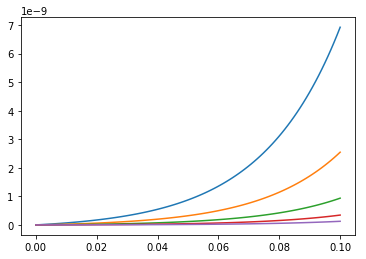

In [122]:
x=np.linspace(0,0.1,100)
for vg in [-10,-5,0,5,10]:
    plt.plot(x,[simple_exp(i,vg)for i in x])
#     plt.plot(x,[simple_quad(i,vg)for i in x],color='b')

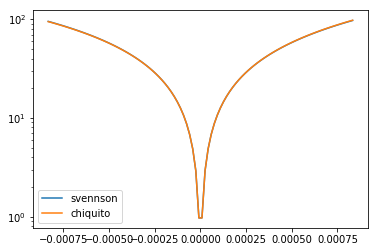

In [79]:
vds=0.1/120
x=np.linspace(-vds,vds,100)
y_svennson=[abs(svennson_current_density(i,0)) for i in x]
y_chiquito=[abs(chiquito_current_density(i,0)) for i in x]
plt.semilogy(x,y_svennson, label="svennson")
plt.semilogy(x,y_chiquito, label="chiquito")
plt.legend()

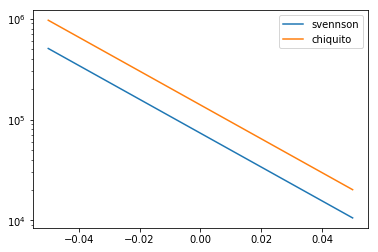

In [117]:
vds=0.1
vg=0.05
x=np.linspace(-vg,vg,100)
y_svennson=[svennson_current_density(vds,i) for i in x]
y_chiquito=[chiquito_current_density(vds,i) for i in x]
plt.semilogy(x,y_svennson, label="svennson")
plt.semilogy(x,y_chiquito, label="chiquito")
plt.legend()

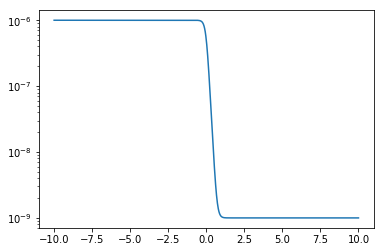

In [114]:
x=np.linspace(-10,10,1000)
def fermi_dirac(x,scaling,offset,threshold):
    return scaling*(1/(np.exp(10*(x-threshold))+1))+offset
y=[ fermi_dirac(i,1e-6,1e-9,0) for i in x]
plt.semilogy(x,y)